# Performing some Regression Methods on Admission Prediction Data


* In this notebook,

    1. We will perform some descriptive analysis on the data & data visualizations .
    2. Create a correlation matrix .
    3. Finding the outliers and replacing them .
    3. Splitting the data to dependent and independent varaibles to test and train the dataset.
    4. We will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression .



### *Importing the required libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### *Loading the dataset*

In [2]:
df= pd.read_csv('Admission_Predict.csv')
df.drop(["Serial No."],axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### *Descriptive statistics of the dataset*

In [3]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### *Performing Data Visualizations*

#### 1.Univariate Analysis

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

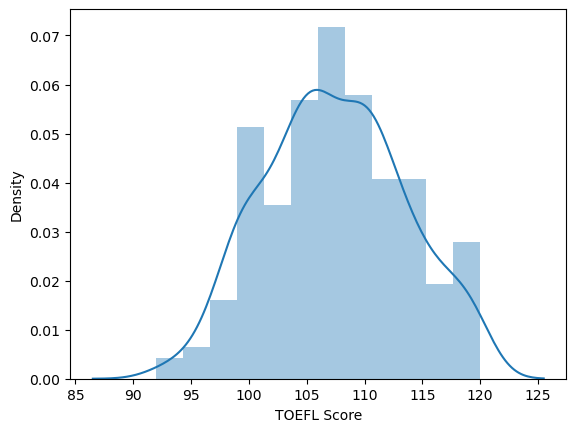

In [6]:
sns.distplot(df['TOEFL Score'])

[]

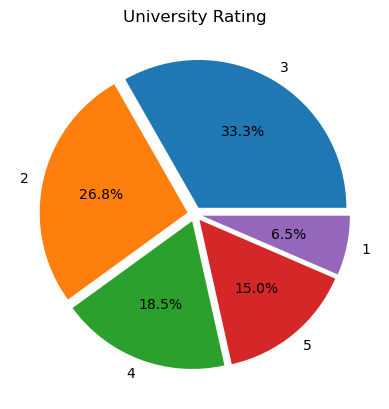

In [7]:
plt.pie(df['University Rating'].value_counts(),[0.05,0.05,0.05,0.05,0.05],df['University Rating'].value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.plot()

<AxesSubplot:ylabel='Research'>

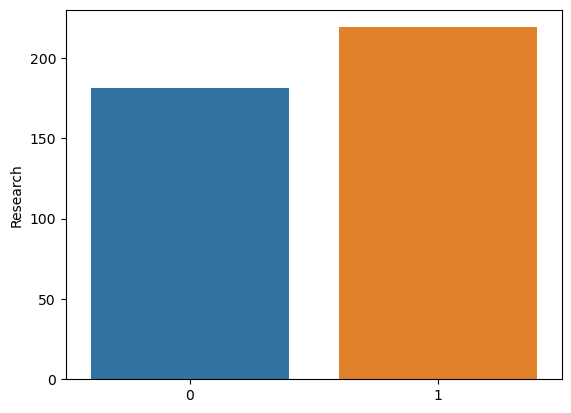

In [8]:
sns.barplot(df.Research.value_counts().index,df.Research.value_counts())

#### 2.Bivariate Analysis

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

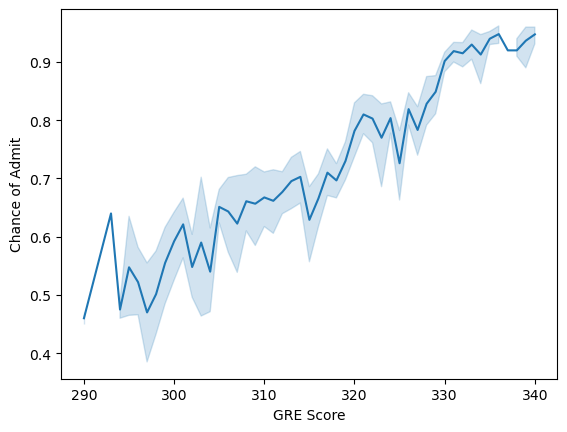

In [9]:
sns.lineplot(df['GRE Score'],df['Chance of Admit'])

In [10]:
def countplot_2(x,hue,title=None,figsize=(12,10)):
    plt.figure(figsize=figsize)
    sns.countplot(data = df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.plot()

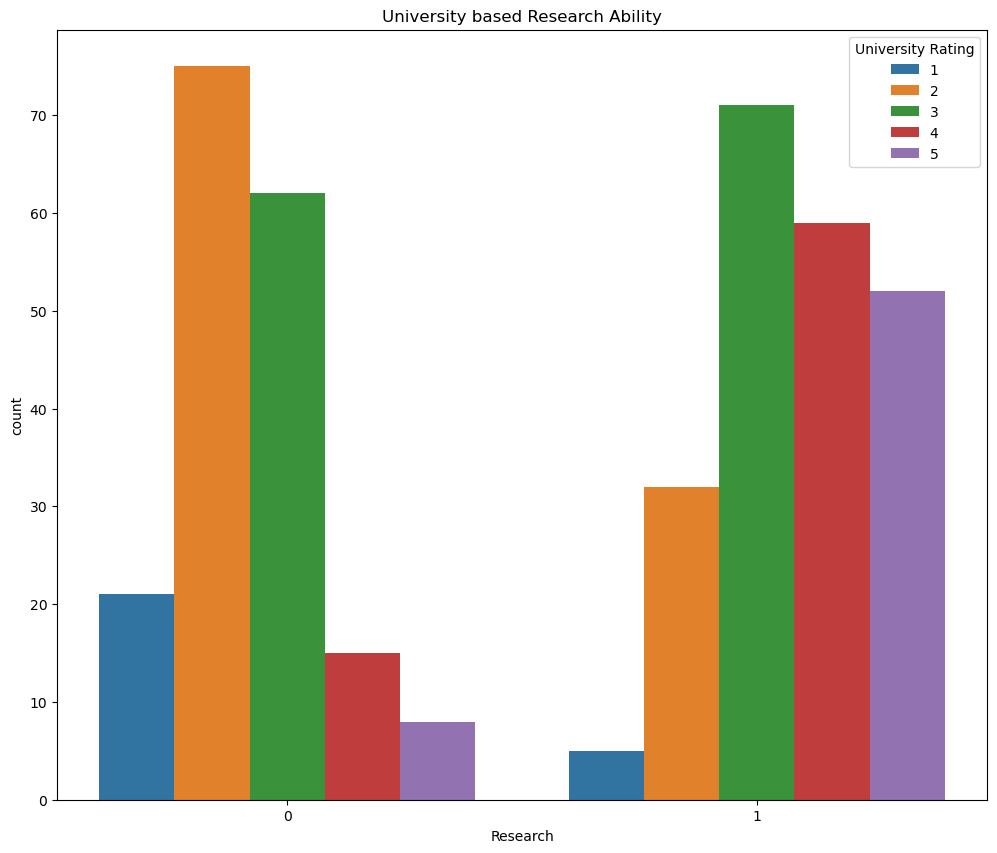

In [11]:
countplot_2('Research','University Rating','University based Research Ability')

#### 3.Multivariate Analysis

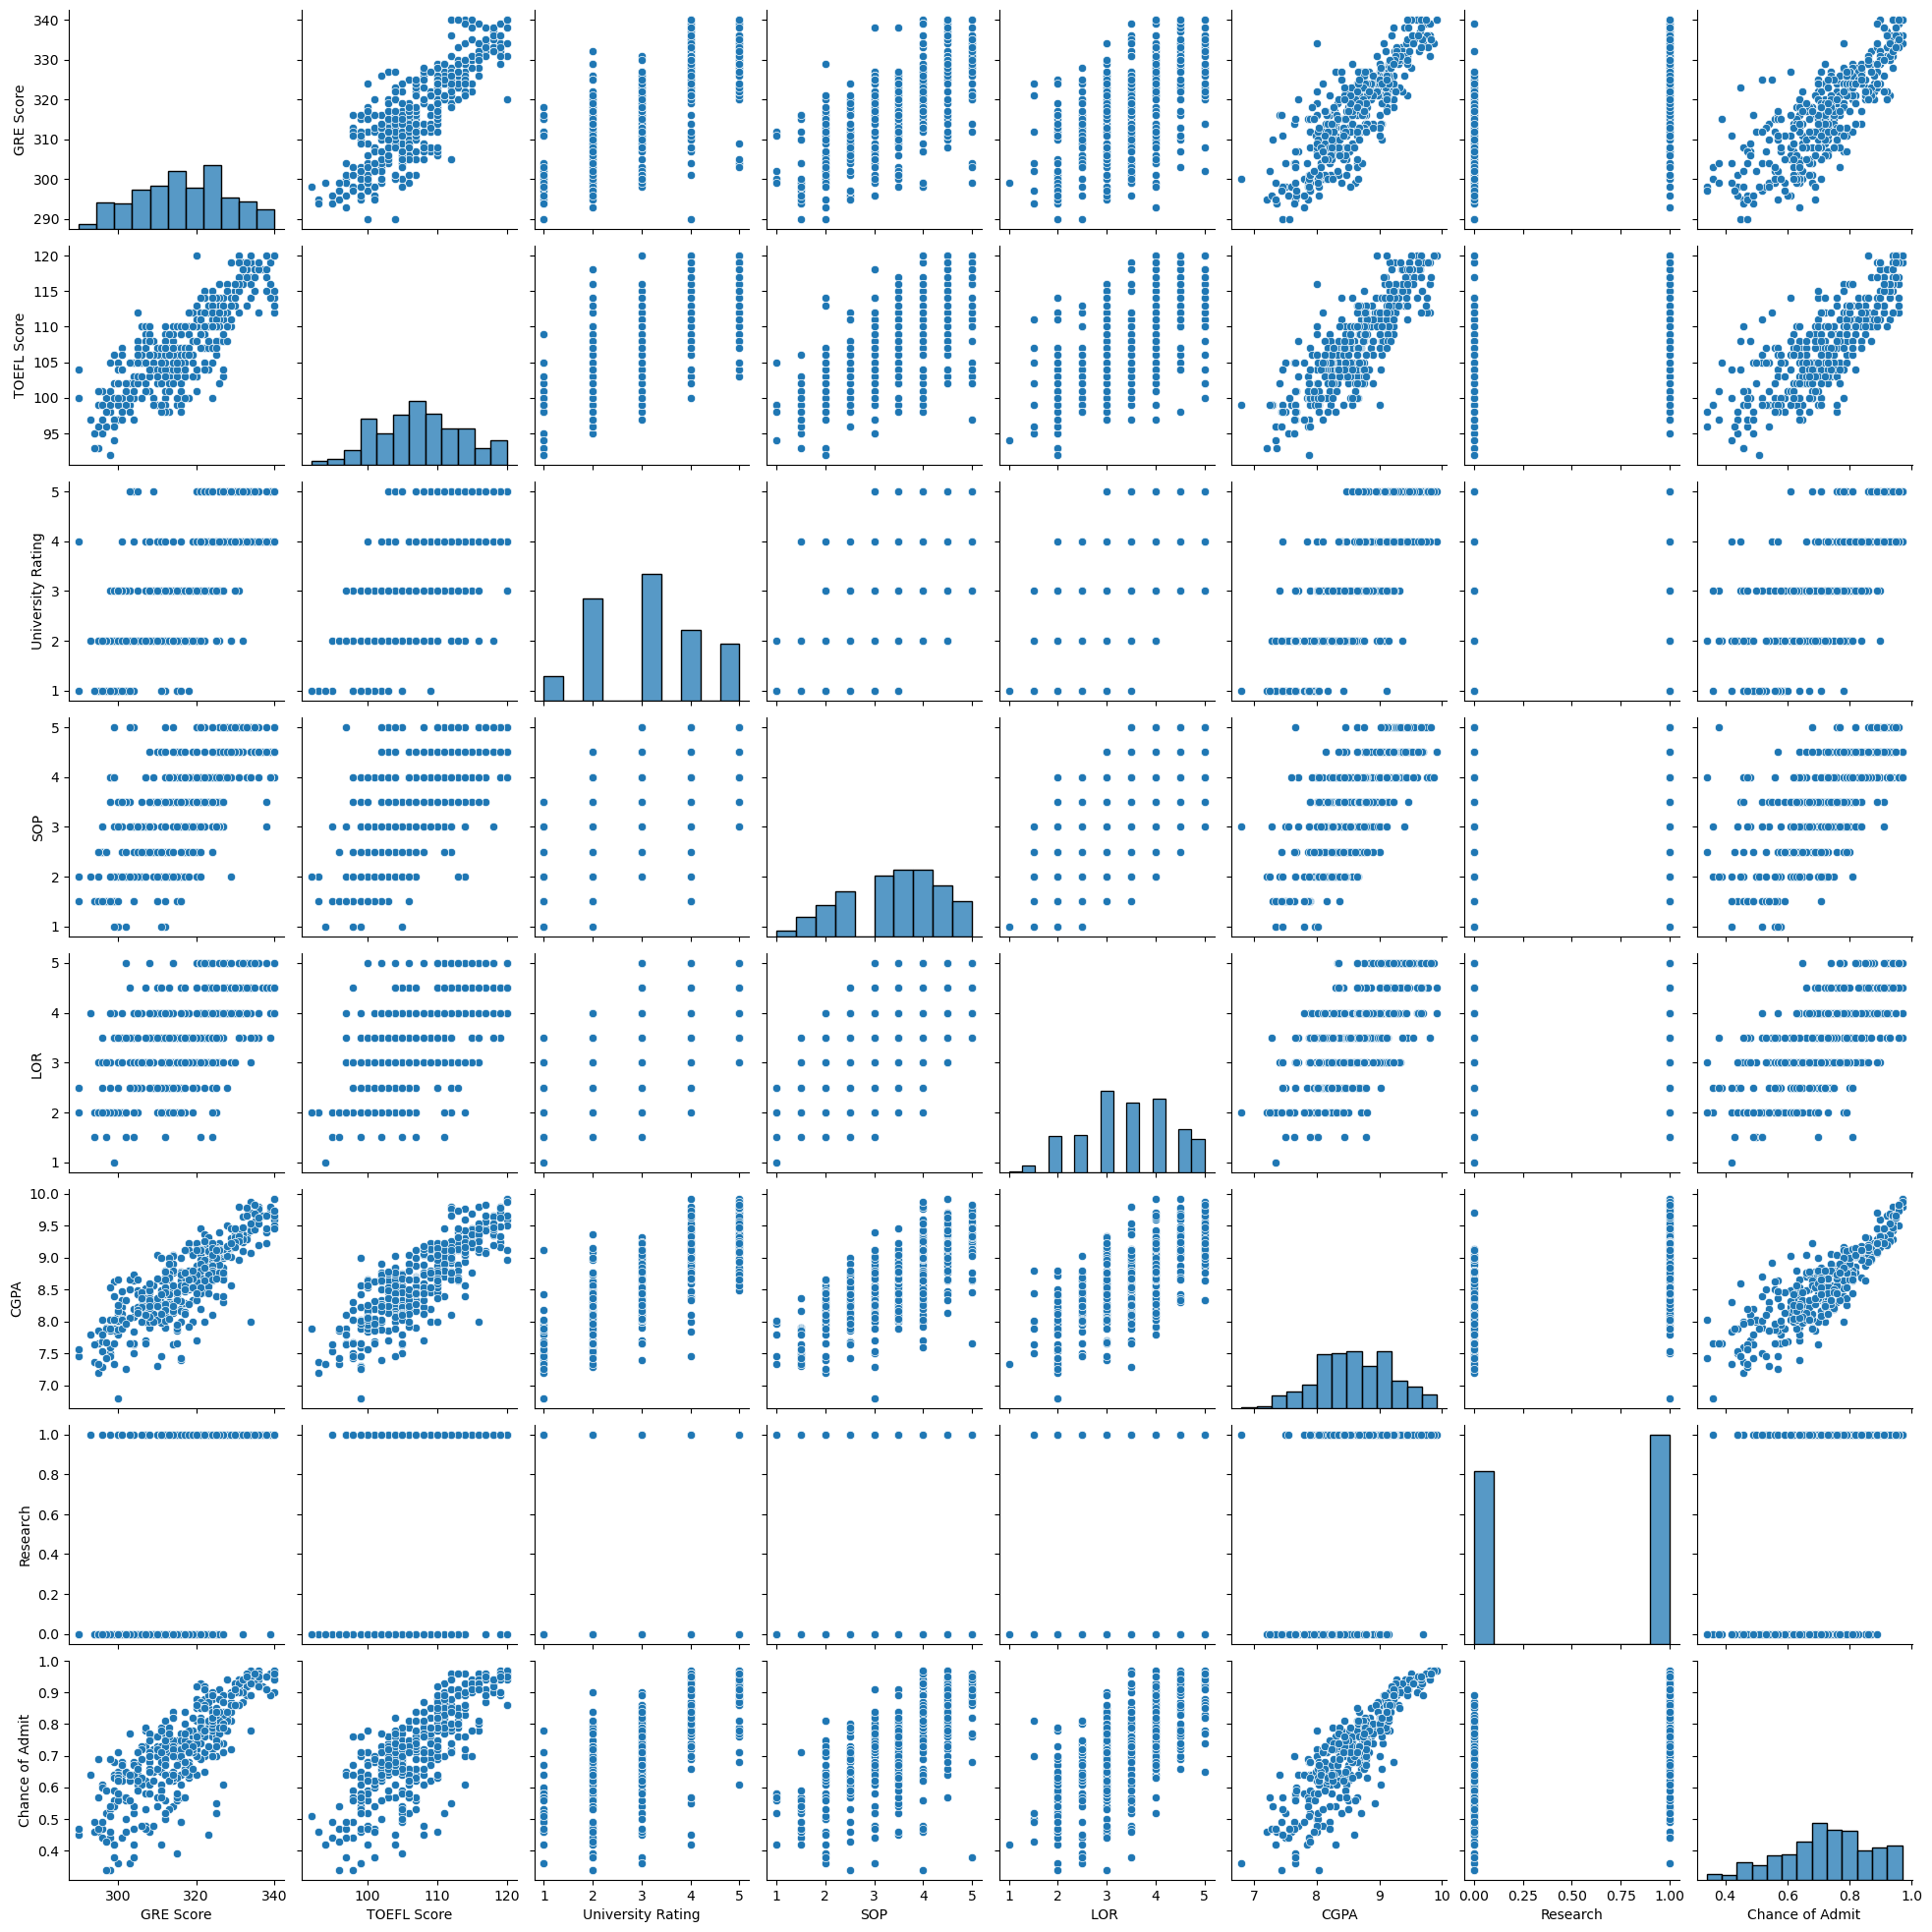

In [12]:
sns.pairplot(df)

### *Creating a correlation matrix*

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


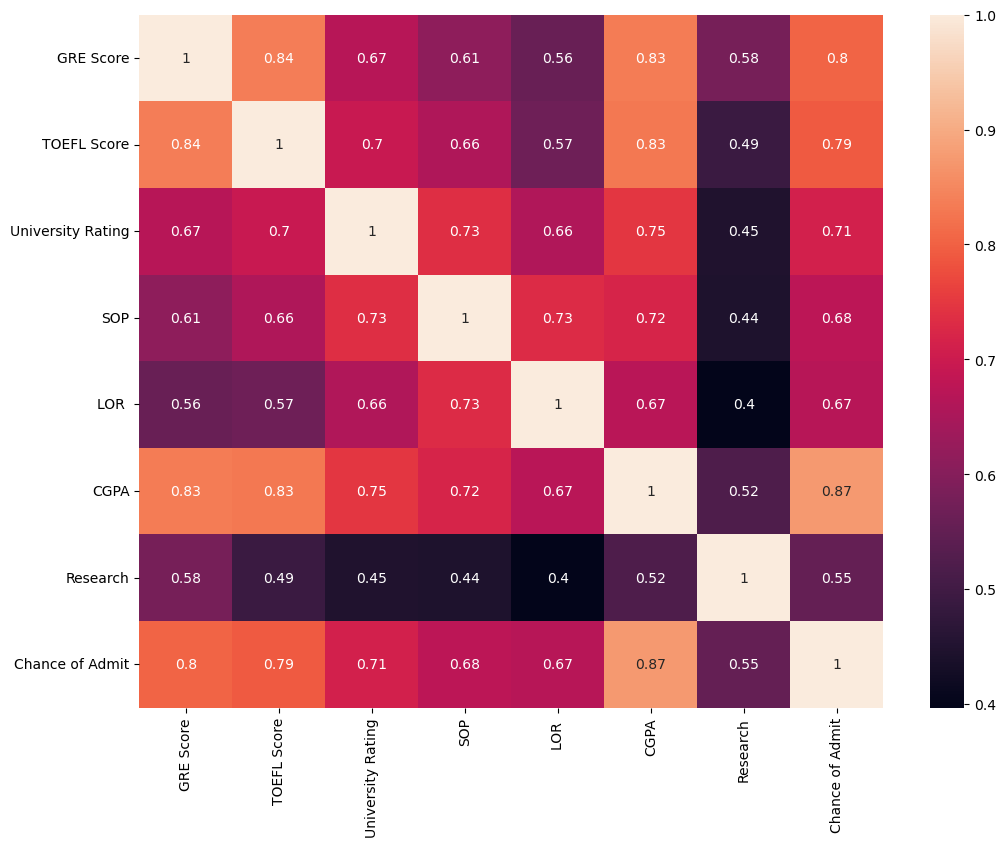

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()


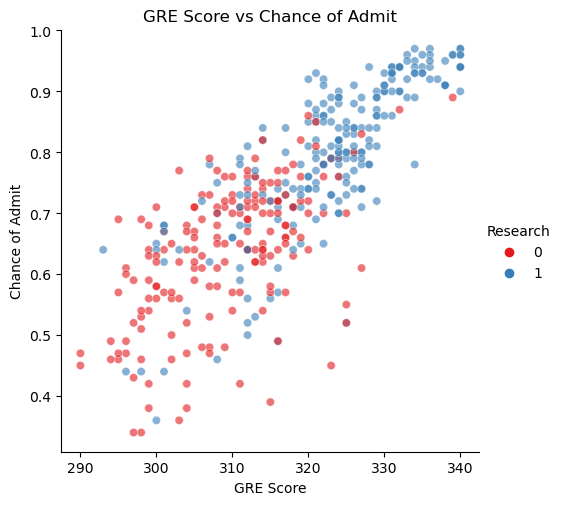

In [15]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.6)
plt.title("GRE Score vs Chance of Admit")
plt.show()

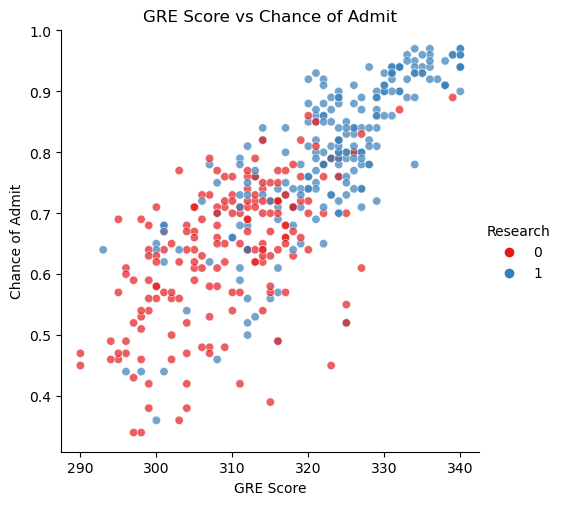

In [16]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

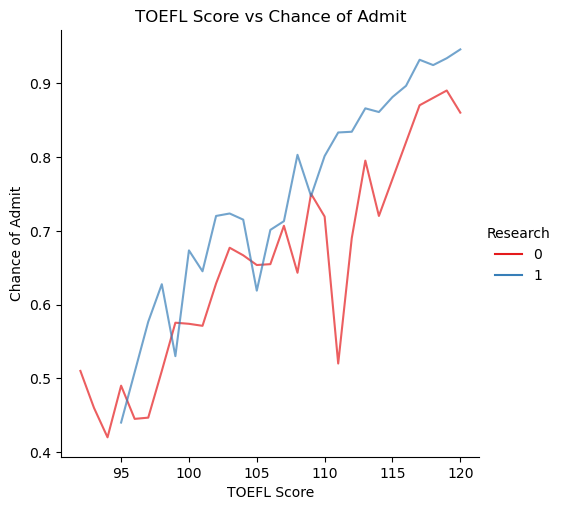

In [17]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

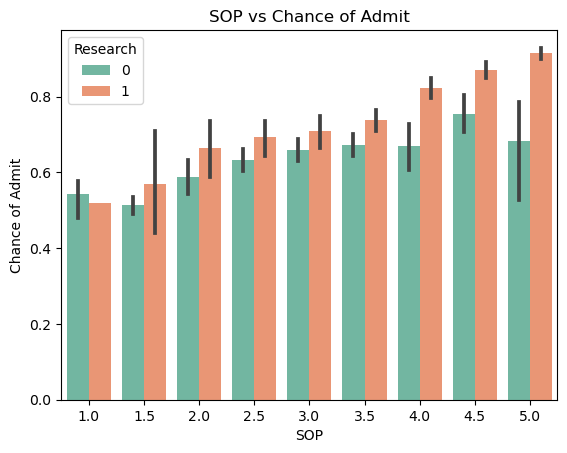

In [18]:
sns.barplot(data=df,x="SOP",y="Chance of Admit",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

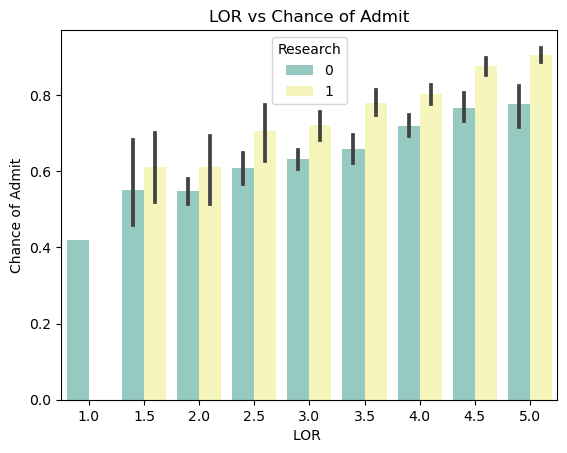

In [19]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

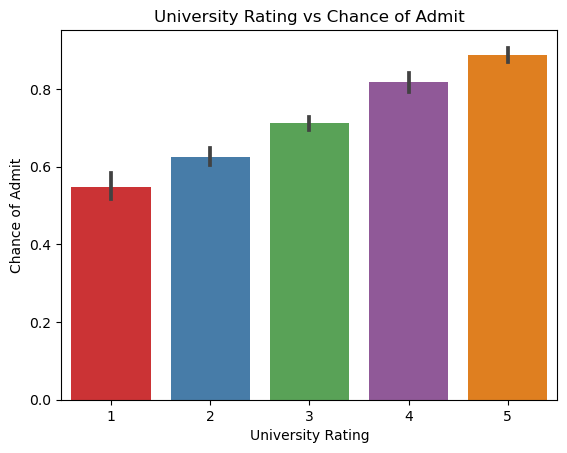

In [20]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

### *Finding the outliers and replacing them* 

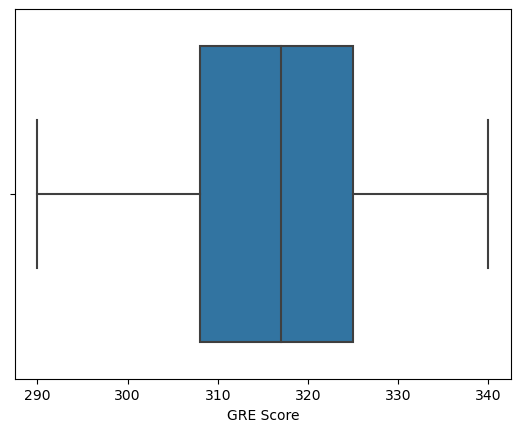

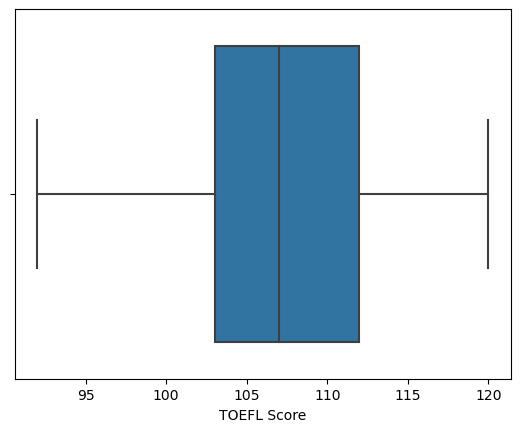

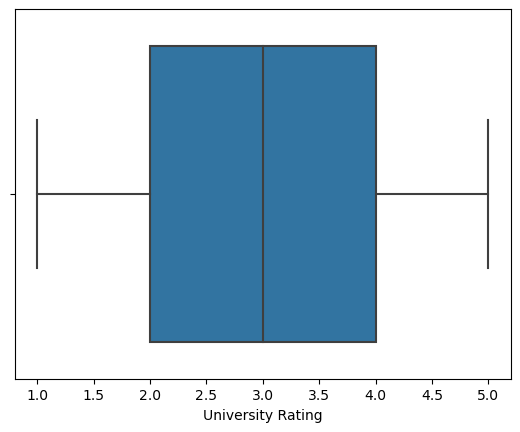

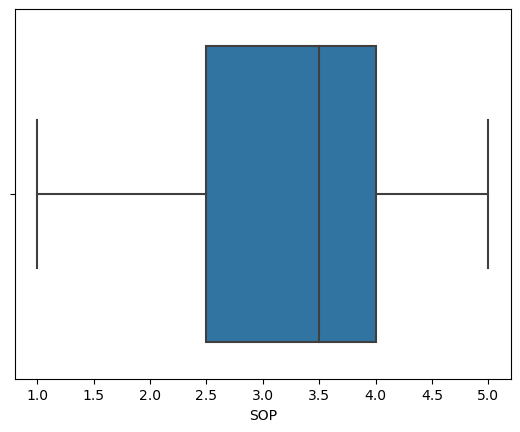

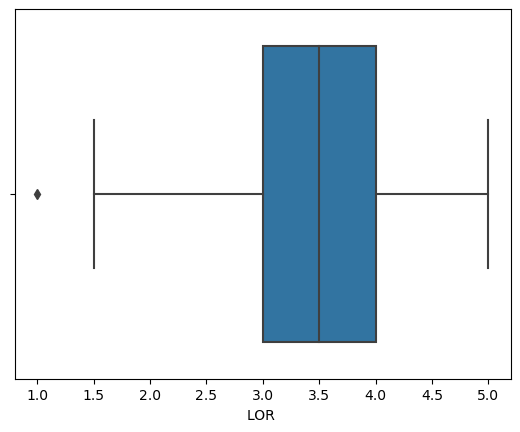

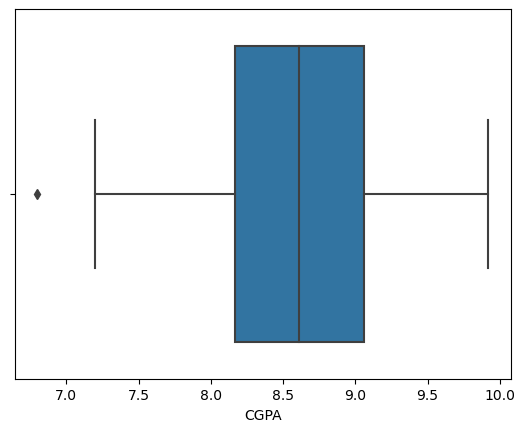

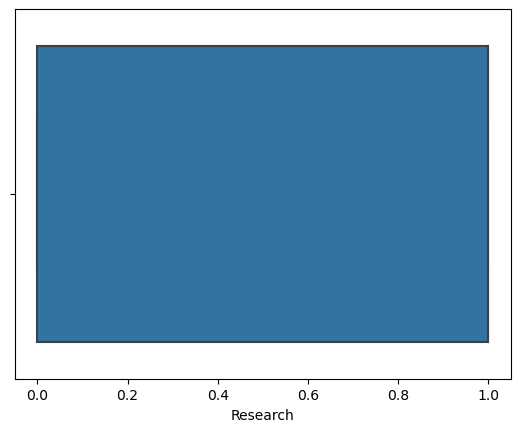

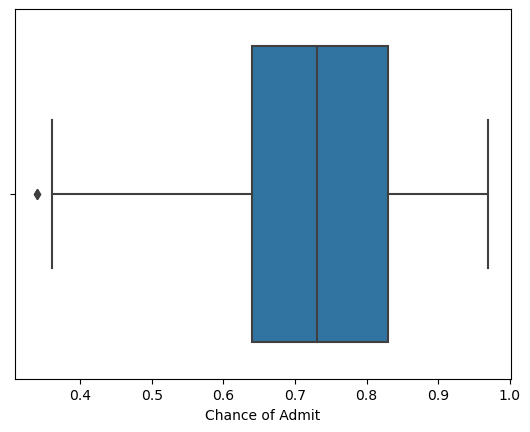

In [21]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [22]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[i] = np.where(df[i]>=upper_limit,Q3 + (1.5*IQR),df[i])
    df[i] = np.where(df[i]<=lower_limit,Q1 - (1.5*IQR),df[i])

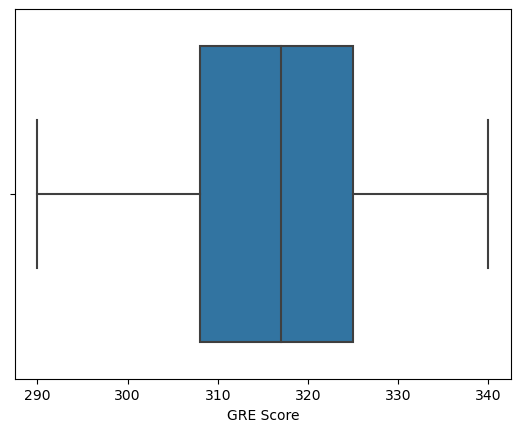

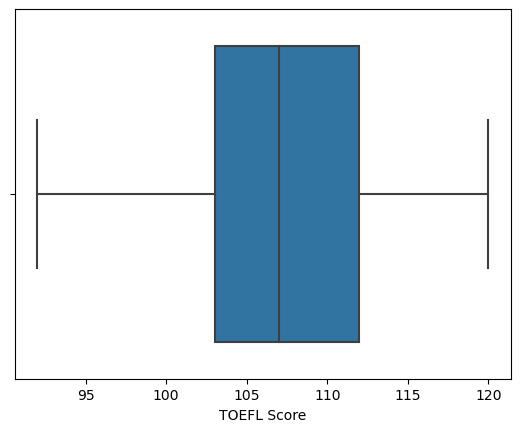

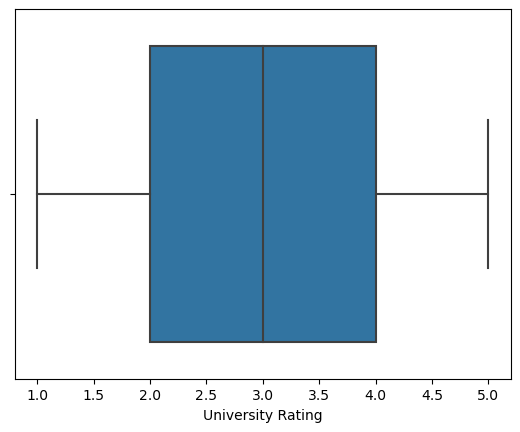

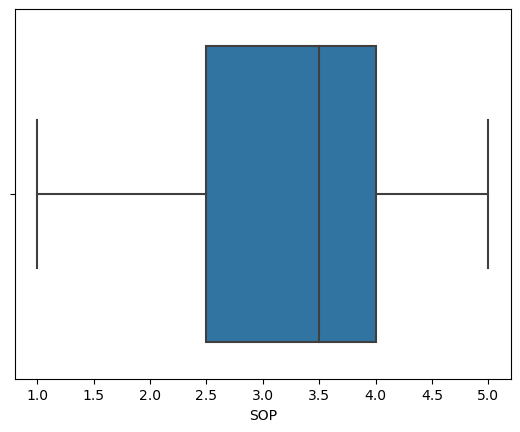

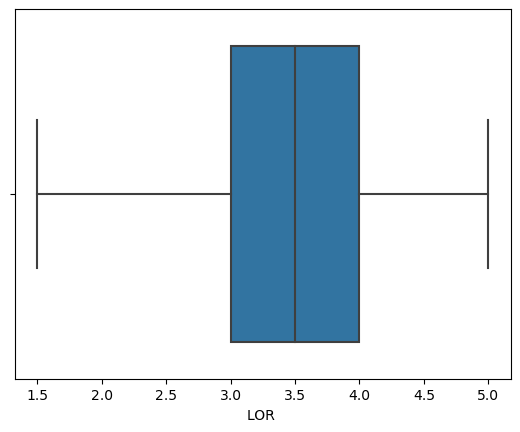

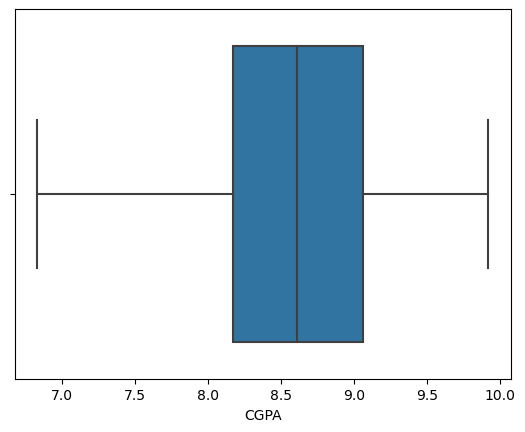

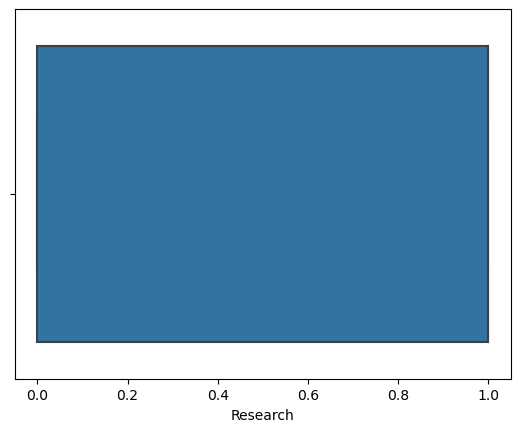

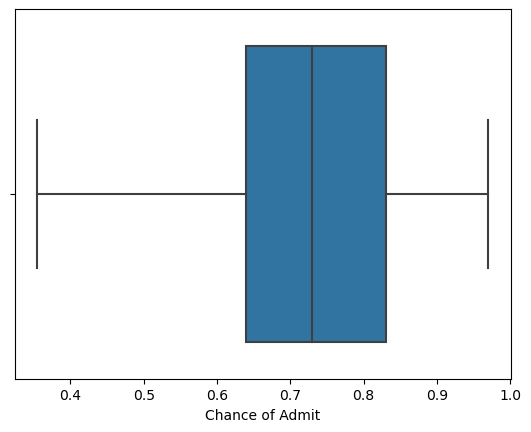

In [23]:
for i in  df.columns:
    sns.boxplot(df[i])
    plt.show()

### *Importing the required libraries for regression analysis*

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

### *Splitting and Scaling the data*

In [25]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit"].values.reshape(-1,1)

In [26]:
scale = MinMaxScaler()
x_Scaled = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_Scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.94,0.928571,0.75,0.875,0.857143,0.912586
1,0.68,0.535714,0.75,0.750,0.857143,0.660057
2,0.52,0.428571,0.50,0.500,0.571429,0.378389
3,0.64,0.642857,0.50,0.625,0.285714,0.595306
4,0.48,0.392857,0.25,0.250,0.428571,0.446378
...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.571429,0.715095
396,0.70,0.535714,0.50,0.500,0.571429,0.737758
397,0.80,0.857143,0.75,1.000,0.857143,0.847835
398,0.44,0.392857,0.50,0.625,0.714286,0.630919


### *Training and Testing the data*

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 6), (320, 1), (80, 6), (80, 1))

### Multiple Linear Regression

In [28]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's score is {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's score is 0.816


### Decision Tree Regression

In [29]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's score is {:.3f}".format(r2_score_tree))

Decision Tree Regression's score is 0.637


### Random Forest Regression

In [30]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's score is {:.3f}".format(r2_score_rfr))

Random Forest Regression's score is 0.806


From this notebook , we conclude that R^2 score is an indicator of accuracy of Regression Models, and the accuracy is measured as close to 1 of this value. Therefore, as seen, Multiple Linear Regression Model is better than Decision Tree Regression and Random Forest Regression on this dataset when comparing their R^2 scores.